# **Test using BLACK-HAT**

In [32]:
import pytesseract
from pytesseract import Output
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from skimage.segmentation import clear_border

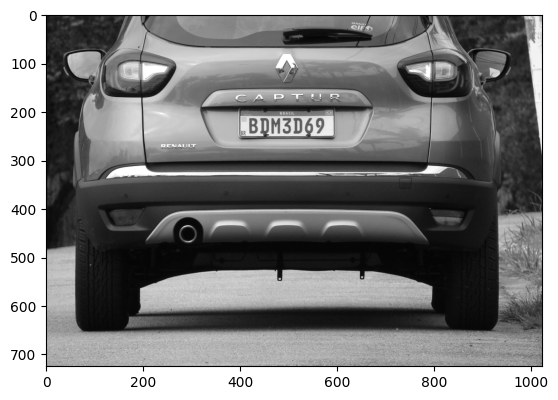

In [33]:
img = cv2.imread('itens/images/placa_carro3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

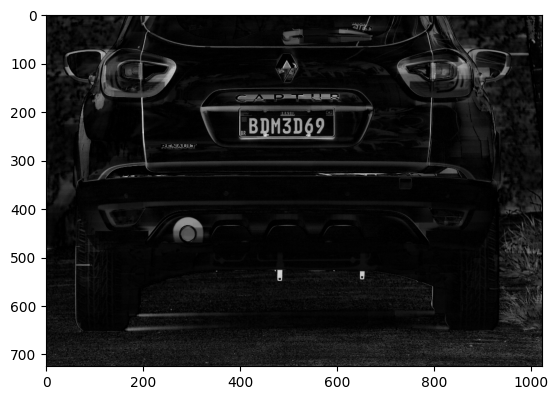

In [34]:
retangular_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, retangular_kernel)
plt.imshow(blackhat, cmap='gray')

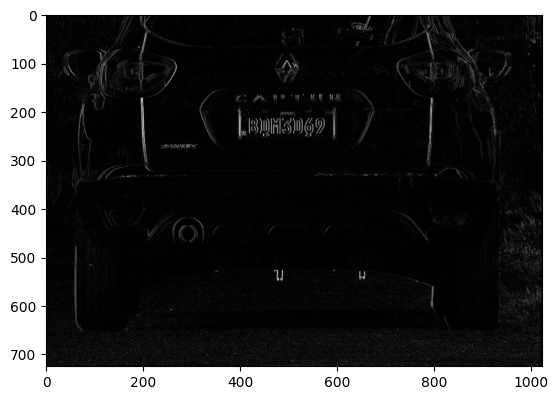

In [35]:
sobel_x = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')
plt.imshow(sobel_x, cmap='gray')

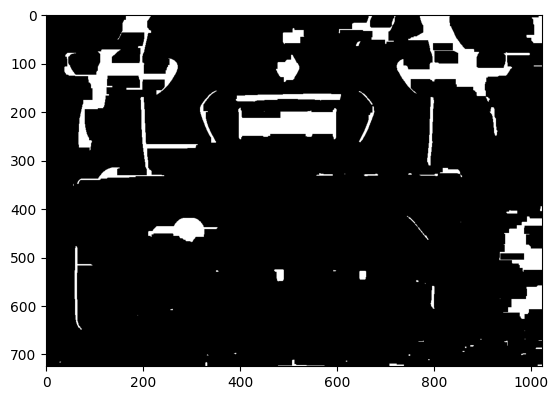

In [36]:
sobel_x = cv2.GaussianBlur(sobel_x, (5, 5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, retangular_kernel)
plt.imshow(sobel_x, cmap='gray')

value, limearization = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
plt.imshow(limearization, cmap='gray')

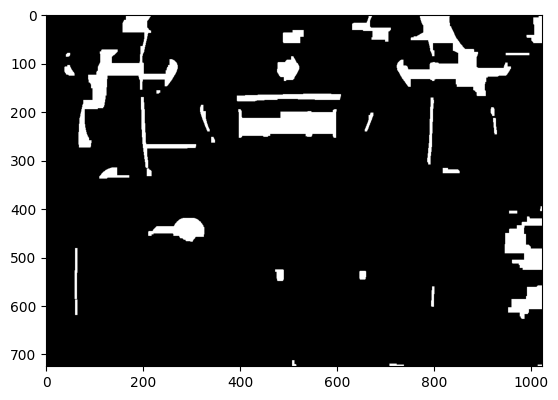

In [37]:
square_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
limearization = cv2.erode(limearization, square_kernel, iterations=2)
limearization = cv2.dilate(limearization, square_kernel, iterations=2)

plt.imshow(limearization, cmap='gray')

# **Creating a mask to use over the limearized image (black hat)**

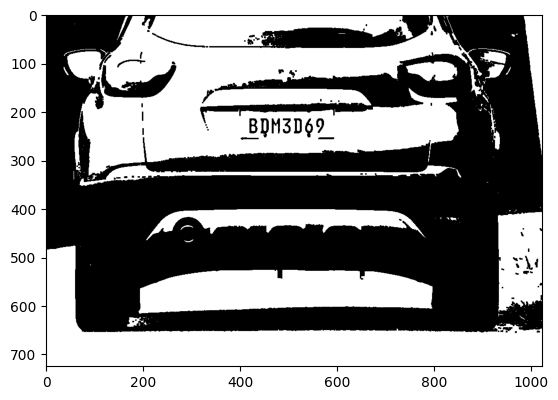

In [38]:
#Criando uma máscara para usar sobre a imagem limearizada (black hat)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, square_kernel)
value, mask = cv2.threshold(closing, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(mask, cmap='gray')

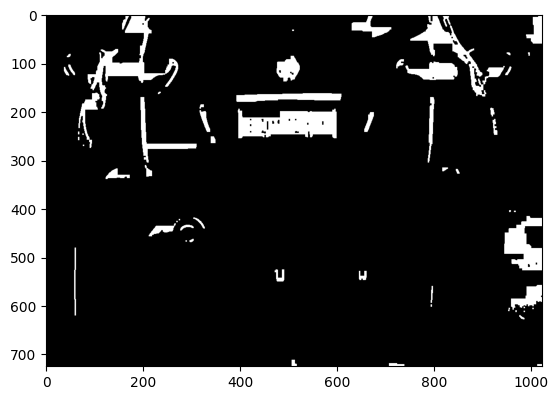

In [39]:
# Sobrepondo as imagens

limearization = cv2.bitwise_and(limearization, limearization, mask=mask)
limearization = cv2.dilate(limearization, square_kernel, iterations=2)
limearization = cv2.erode(limearization, square_kernel)

plt.imshow(limearization, cmap='gray')

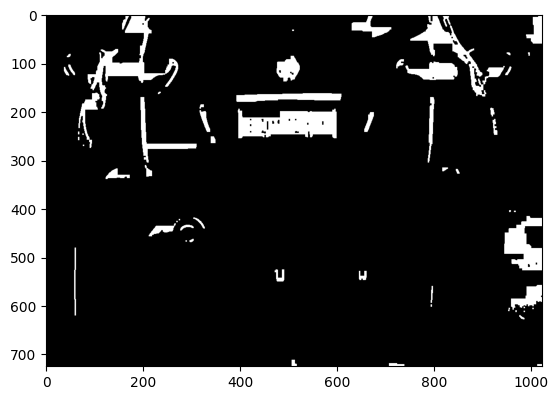

In [40]:
limiarization = clear_border(limearization)
plt.imshow(limearization, cmap='gray')

In [41]:
contours, hierarchy = cv2.findContours(limearization, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

[array([[[397, 195]],
 
        [[397, 197]],
 
        [[396, 198]],
 
        [[396, 202]],
 
        [[397, 203]],
 
        [[397, 255]],
 
        [[403, 255]],
 
        [[405, 253]],
 
        [[405, 252]],
 
        [[406, 251]],
 
        [[446, 251]],
 
        [[448, 253]],
 
        [[450, 253]],
 
        [[450, 249]],
 
        [[451, 248]],
 
        [[453, 248]],
 
        [[454, 249]],
 
        [[454, 253]],
 
        [[458, 253]],
 
        [[460, 251]],
 
        [[463, 251]],
 
        [[463, 248]],
 
        [[464, 247]],
 
        [[534, 247]],
 
        [[535, 248]],
 
        [[535, 252]],
 
        [[537, 252]],
 
        [[538, 253]],
 
        [[540, 253]],
 
        [[540, 242]],
 
        [[541, 241]],
 
        [[543, 241]],
 
        [[544, 242]],
 
        [[544, 247]],
 
        [[545, 248]],
 
        [[545, 253]],
 
        [[548, 253]],
 
        [[549, 252]],
 
        [[549, 251]],
 
        [[550, 250]],
 
        [[550, 248]],
 
        [[551, 2

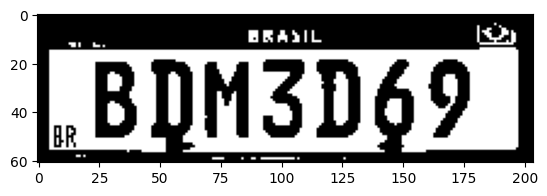

In [42]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    prop = float(w) / h
    if prop >= 3 and prop <= 3.5:
        plate = img[y:y+h, x:x+w]
        value,interested_region = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        interested_region = clear_border(interested_region)
        plt.imshow(interested_region, cmap='gray')

In [43]:
config_tesseract = '--tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata" --psm 6'
txt = pytesseract.image_to_string(interested_region, lang='por',  config=config_tesseract)

In [44]:
extracted_text = re.search('\w{3}\d{1}\w{1}\d{2}', txt)

print(f'Placa = {extracted_text.group()}')

Placa = BDM3D69


# **Topics**
-    Utilizar máscaras para filtrar regiões em imagens;
-   Explicar e aplicar o efeito Sobel em imagens;
-   Aplicar a segmentação de remoção de bordas em imagens;
-   Encontrar a região da placa de um veículo em uma imagem de uma forma alternativa.